PROBLEM STATEMENT: You own an online clothing business and you would like to develop a new app(or in-store) feature in which customers will enter their own weight and height and the system would predict what T-shirt size they should wear. Features are height and weight and the output is either (L)large or small(S).

In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Importing dataset
df=pd.read_csv("Tshirt_Sizing_Dataset.csv")
df

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [11]:
#splitting the datasets into inputs and targets
x=df.iloc[:,0:2].values #inputs
x

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [12]:
#targets
y=df.iloc[:, 2].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [14]:
#Now providing labels to the targets
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
target=labelencoder_y.fit_transform(y)
target

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
#Now splitting the dataset into train-test sets
x_train, x_test, y_train, y_test=train_test_split(x,target, test_size=0.25, random_state=365, stratify=target)

In [43]:
#Using KNN Classifier
clf=KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p =2 )

In [44]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
y_predict=clf.predict(x_test)

C:\Users\Beyond\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
y_predict

array([1, 0, 1, 0, 1])

In [47]:
#Predicting an unseen data
weight=61
height=161
x_unseen_data=([[height,weight]])

In [48]:
clf.predict(x_unseen_data)

C:\Users\Beyond\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

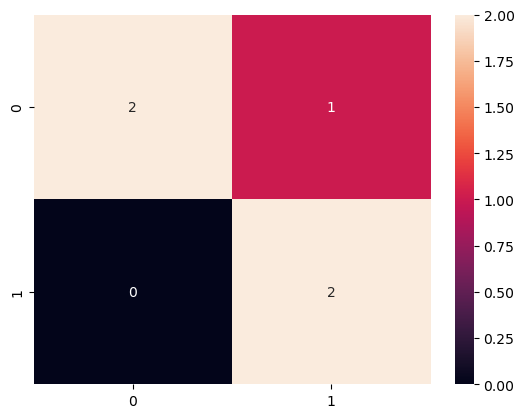

In [50]:
sns.heatmap(cm, annot=True, fmt="d")

In [51]:
#Printing classification report
print(classification_report(y_test, y_predict, target_names=["small","large"]))

              precision    recall  f1-score   support

       small       1.00      0.67      0.80         3
       large       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

